<img src="./assets/ga-logo.png" style="float: left; margin: 20px; height: 55px">

# Lab: Simple Linear Regression with Sacramento Real Estate Data - Sample Solution

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

### 1. Read in the Sacramento housing data set.

In [2]:
dataset = pd.read_csv('sacramento_real_estate_transactions.csv')

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [3]:
# Check the dtypes.
dataset.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [4]:
# Zip code works better as a string object (categorical) so we will have to convert it.
dataset['state'].value_counts()

state
CA    984
AC      1
Name: count, dtype: int64

In [5]:
display(dataset[dataset['state'] == 'AC'])
dataset = dataset[dataset['state'] != 'AC']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [6]:
dataset['city'].value_counts()

city
SACRAMENTO         438
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
ROCKLIN             17
FOLSOM              17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
RANCHO MURIETA       3
WEST SACRAMENTO      3
GRANITE BAY          3
POLLOCK PINES        3
EL DORADO            2
LOOMIS               2
MATHER               1
GREENWOOD            1
MEADOW VISTA         1
PENRYN               1
FORESTHILL           1
SHINGLE SPRINGS      1
DIAMOND SPRINGS      1
COOL                 1
WALNUT GROVE         1
GARDEN VALLEY        1
SLOUGHHOUSE          1
Name: count, dtype: int64

In [7]:
dataset.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [8]:
dataset_encoded = pd.get_dummies(dataset, columns=['city'], drop_first=True)
dataset_encoded

,street,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,...,city_RANCHO MURIETA,city_RIO LINDA,city_ROCKLIN,city_ROSEVILLE,city_SACRAMENTO,city_SHINGLE SPRINGS,city_SLOUGHHOUSE,city_WALNUT GROVE,city_WEST SACRAMENTO,city_WILTON
0,3526 HIGH ST,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,...,False,False,False,False,True,False,False,False,False,False
1,51 OMAHA CT,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,...,False,False,False,False,True,False,False,False,False,False
2,2796 BRANCH ST,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,...,False,False,False,False,True,False,False,False,False,False
3,2805 JANETTE WAY,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,...,False,False,False,False,True,False,False,False,False,False
4,6001 MCMAHON DR,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,...,False,False,False,False,True,False,False,False,False,False
981,6932 RUSKUT WAY,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,...,False,False,False,False,True,False,False,False,False,False
982,7933 DAFFODIL WAY,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,...,False,False,False,False,False,False,False,False,False,False
983,8304 RED FOX WAY,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,...,False,False,False,False,False,False,False,False,False,False


In [9]:
dataset_encoded.columns

Index(['street', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude', 'city_AUBURN',
       'city_CAMERON PARK', 'city_CARMICHAEL', 'city_CITRUS HEIGHTS',
       'city_COOL', 'city_DIAMOND SPRINGS', 'city_EL DORADO',
       'city_EL DORADO HILLS', 'city_ELK GROVE', 'city_ELVERTA',
       'city_FAIR OAKS', 'city_FOLSOM', 'city_FORESTHILL', 'city_GALT',
       'city_GARDEN VALLEY', 'city_GOLD RIVER', 'city_GRANITE BAY',
       'city_GREENWOOD', 'city_LINCOLN', 'city_LOOMIS', 'city_MATHER',
       'city_MEADOW VISTA', 'city_NORTH HIGHLANDS', 'city_ORANGEVALE',
       'city_PENRYN', 'city_PLACERVILLE', 'city_POLLOCK PINES',
       'city_RANCHO CORDOVA', 'city_RANCHO MURIETA', 'city_RIO LINDA',
       'city_ROCKLIN', 'city_ROSEVILLE', 'city_SACRAMENTO',
       'city_SHINGLE SPRINGS', 'city_SLOUGHHOUSE', 'city_WALNUT GROVE',
       'city_WEST SACRAMENTO', 'city_WILTON'],
      dtype='object')

In [10]:
dataset_encoded['street'].value_counts()

street
1223 LAMBERTON CIR    2
8306 CURLEW CT        2
4734 14TH AVE         2
7 CRYSTALWOOD CIR     2
2805 JANETTE WAY      1
                     ..
9169 GARLINGTON CT    1
6932 RUSKUT WAY       1
7933 DAFFODIL WAY     1
8304 RED FOX WAY      1
51 OMAHA CT           1
Name: count, Length: 980, dtype: int64

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

In [11]:
# Check out the summary statistics:
dataset_encoded.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,95750.611789,2.913618,1.777439,1315.253049,234167.841463,38.607670,-121.355832
std,85.176913,1.307175,0.895484,853.416702,138434.220875,0.145494,0.138268
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,951.500000,145000.000000,38.482714,-121.446121
50%,95762.000000,3.000000,2.000000,1304.000000,214375.000000,38.626257,-121.376010
75%,95828.000000,4.000000,2.000000,1718.500000,300000.000000,38.695611,-121.295557
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


In [12]:
# Drop rows where type is 'Unkown'
dataset_encoded = dataset_encoded[dataset_encoded['type'] != 'Unkown']

In [13]:
type_map = {'Multi-Family': 3, 'Condo': 2, 'Residential': 1}
dataset_encoded['type_num'] = dataset_encoded['type'].map(type_map)

C:\Users\TEMP.DESKTOP-SC7NPT3\AppData\Local\Temp\ipykernel_15512\2025873129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_encoded['type_num'] = dataset_encoded['type'].map(type_map)


In [14]:
dataset_encoded['type_num'].value_counts()

type_num
1    917
2     53
3     13
Name: count, dtype: int64

In [15]:
dataset_encoded['type_num']

0      1
1      1
2      1
3      1
4      1
      ..
980    1
981    1
982    1
983    1
984    1
Name: type_num, Length: 983, dtype: int64

In [16]:
dataset_encoded

,street,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,...,city_RIO LINDA,city_ROCKLIN,city_ROSEVILLE,city_SACRAMENTO,city_SHINGLE SPRINGS,city_SLOUGHHOUSE,city_WALNUT GROVE,city_WEST SACRAMENTO,city_WILTON,type_num
0,3526 HIGH ST,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,...,False,False,False,True,False,False,False,False,False,1
1,51 OMAHA CT,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,...,False,False,False,True,False,False,False,False,False,1
2,2796 BRANCH ST,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,...,False,False,False,True,False,False,False,False,False,1
3,2805 JANETTE WAY,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,...,False,False,False,True,False,False,False,False,False,1
4,6001 MCMAHON DR,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,...,False,False,False,True,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,...,False,False,False,True,False,False,False,False,False,1
981,6932 RUSKUT WAY,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,...,False,False,False,True,False,False,False,False,False,1
982,7933 DAFFODIL WAY,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,...,False,False,False,False,False,False,False,False,False,1
983,8304 RED FOX WAY,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,...,False,False,False,False,False,False,False,False,False,1


In [17]:
# What could explain the houses with 0 bedrooms?
dataset_encoded = dataset_encoded[dataset_encoded['sq__ft'] != 0]

In [18]:
dataset_encoded[dataset_encoded['state'] == 'CA']

,street,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,...,city_RIO LINDA,city_ROCKLIN,city_ROSEVILLE,city_SACRAMENTO,city_SHINGLE SPRINGS,city_SLOUGHHOUSE,city_WALNUT GROVE,city_WEST SACRAMENTO,city_WILTON,type_num
0,3526 HIGH ST,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,...,False,False,False,True,False,False,False,False,False,1
1,51 OMAHA CT,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,...,False,False,False,True,False,False,False,False,False,1
2,2796 BRANCH ST,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,...,False,False,False,True,False,False,False,False,False,1
3,2805 JANETTE WAY,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,...,False,False,False,True,False,False,False,False,False,1
4,6001 MCMAHON DR,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,...,False,False,False,True,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,9169 GARLINGTON CT,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,...,False,False,False,True,False,False,False,False,False,1
981,6932 RUSKUT WAY,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,...,False,False,False,True,False,False,False,False,False,1
982,7933 DAFFODIL WAY,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,...,False,False,False,False,False,False,False,False,False,1
983,8304 RED FOX WAY,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,...,False,False,False,False,False,False,False,False,False,1


In [19]:
# What about the houses that are less than 0 dollars? 
dataset_encoded[dataset_encoded['price'] <= 0]

,street,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,...,city_RIO LINDA,city_ROCKLIN,city_ROSEVILLE,city_SACRAMENTO,city_SHINGLE SPRINGS,city_SLOUGHHOUSE,city_WALNUT GROVE,city_WEST SACRAMENTO,city_WILTON,type_num


In [20]:
# And the houses with negative square footage?
dataset_encoded[dataset_encoded['sq__ft'] <= 0]

,street,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,...,city_RIO LINDA,city_ROCKLIN,city_ROSEVILLE,city_SACRAMENTO,city_SHINGLE SPRINGS,city_SLOUGHHOUSE,city_WALNUT GROVE,city_WEST SACRAMENTO,city_WILTON,type_num


In [21]:
# Let's check if any other values are labeled incorrectly.
dataset_encoded.columns

Index(['street', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude', 'city_AUBURN',
       'city_CAMERON PARK', 'city_CARMICHAEL', 'city_CITRUS HEIGHTS',
       'city_COOL', 'city_DIAMOND SPRINGS', 'city_EL DORADO',
       'city_EL DORADO HILLS', 'city_ELK GROVE', 'city_ELVERTA',
       'city_FAIR OAKS', 'city_FOLSOM', 'city_FORESTHILL', 'city_GALT',
       'city_GARDEN VALLEY', 'city_GOLD RIVER', 'city_GRANITE BAY',
       'city_GREENWOOD', 'city_LINCOLN', 'city_LOOMIS', 'city_MATHER',
       'city_MEADOW VISTA', 'city_NORTH HIGHLANDS', 'city_ORANGEVALE',
       'city_PENRYN', 'city_PLACERVILLE', 'city_POLLOCK PINES',
       'city_RANCHO CORDOVA', 'city_RANCHO MURIETA', 'city_RIO LINDA',
       'city_ROCKLIN', 'city_ROSEVILLE', 'city_SACRAMENTO',
       'city_SHINGLE SPRINGS', 'city_SLOUGHHOUSE', 'city_WALNUT GROVE',
       'city_WEST SACRAMENTO', 'city_WILTON', 'type_num'],
      dtype='object')

In [22]:
dataset_encoded.head(4)

,street,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,...,city_RIO LINDA,city_ROCKLIN,city_ROSEVILLE,city_SACRAMENTO,city_SHINGLE SPRINGS,city_SLOUGHHOUSE,city_WALNUT GROVE,city_WEST SACRAMENTO,city_WILTON,type_num
0,3526 HIGH ST,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,...,False,False,False,True,False,False,False,False,False,1
1,51 OMAHA CT,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,...,False,False,False,True,False,False,False,False,False,1
2,2796 BRANCH ST,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,...,False,False,False,True,False,False,False,False,False,1
3,2805 JANETTE WAY,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,...,False,False,False,True,False,False,False,False,False,1


In [23]:
# It looks like only one row is mislabeled, so we'll just drop that row.
dataset_regression = dataset_encoded[[ 'zip', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude', 'type_num',
       'city_AUBURN', 'city_CAMERON PARK', 'city_CARMICHAEL',
       'city_CITRUS HEIGHTS', 'city_COOL', 'city_DIAMOND SPRINGS',
       'city_EL DORADO', 'city_EL DORADO HILLS', 'city_ELK GROVE',
       'city_ELVERTA', 'city_FAIR OAKS', 'city_FOLSOM', 'city_GALT',
       'city_GARDEN VALLEY', 'city_GOLD RIVER', 'city_GRANITE BAY',
       'city_GREENWOOD', 'city_LINCOLN', 'city_LOOMIS', 'city_MATHER',
       'city_MEADOW VISTA', 'city_NORTH HIGHLANDS', 'city_ORANGEVALE',
       'city_PENRYN', 'city_PLACERVILLE', 'city_POLLOCK PINES',
       'city_RANCHO CORDOVA', 'city_RANCHO MURIETA', 'city_RIO LINDA',
       'city_ROCKLIN', 'city_ROSEVILLE', 'city_SACRAMENTO', 'city_SLOUGHHOUSE',
       'city_WALNUT GROVE', 'city_WEST SACRAMENTO', 'city_WILTON']]

<Axes: >

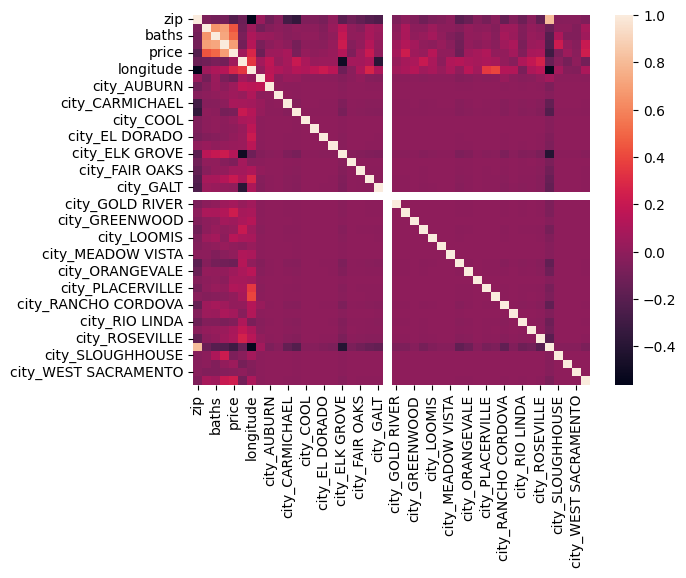

In [24]:
dataset_corr = dataset_regression.corr(numeric_only=True)
sns.heatmap(dataset_corr)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

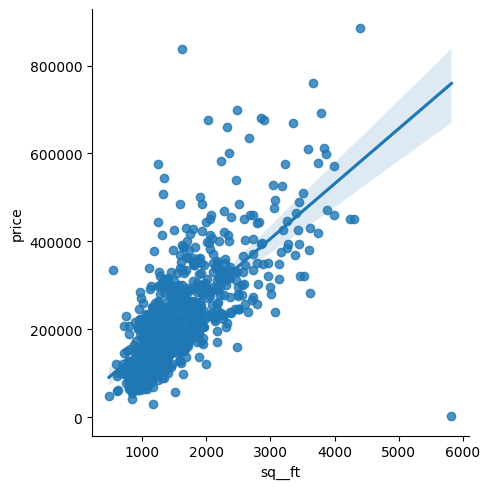

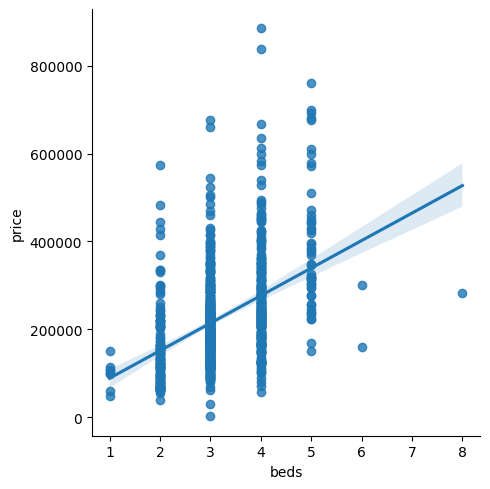

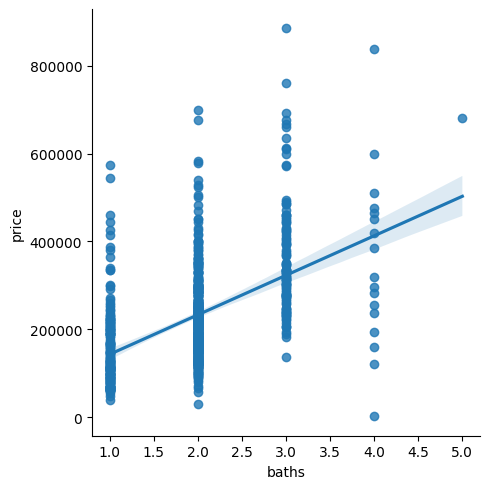

In [25]:
sns.lmplot(x='sq__ft', y='price', data=dataset_regression)
plt.show()
sns.lmplot(x='beds', y='price', data=dataset_regression)
plt.show()
sns.lmplot(x='baths', y='price', data=dataset_regression)
plt.show()

In [26]:
dataset_regression.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude,type_num
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,95761.400984,3.247232,1.961870,1591.892989,229471.130381,38.576931,-121.378533,1.082411
std,85.357516,0.849012,0.669367,663.908347,119897.576889,0.126352,0.119730,0.328226
min,95603.000000,1.000000,1.000000,484.000000,2000.000000,38.241514,-121.550527,1.000000
25%,95670.000000,3.000000,2.000000,1144.000000,148750.000000,38.473814,-121.451444,1.000000
50%,95820.000000,3.000000,2.000000,1419.000000,207973.000000,38.591618,-121.404999,1.000000
75%,95828.000000,4.000000,2.000000,1851.000000,285000.000000,38.674864,-121.325730,1.000000
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599,3.000000


In [27]:
# To drop the outlier
dataset_regression = dataset_regression[dataset_regression['price'] > 5000]

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [28]:
# Square fit is the highest affect to the price
# Number of baths is second 
# Number of bedrooms is the third

<Axes: >

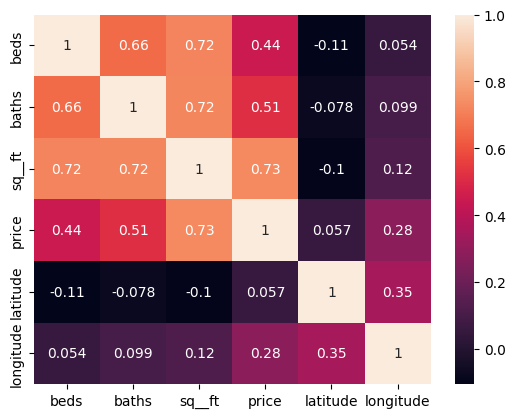

In [29]:
price_corr = dataset_regression[['beds', 'baths', 'sq__ft', 'type', 'sale_date', 'price',
       'latitude', 'longitude']].corr(numeric_only=True)
sns.heatmap(price_corr, annot=True)

### 5. Build a Linear Regression model that will take in  `y` and `X`, and return the intercept and slope coefficients.. 

`y` is the target variable and `X` is the predictor variable.

- **Report the slope and intercept.**

In [30]:
x = dataset_regression[['sq__ft']]
y = dataset_regression['price']

In [31]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

### 6. Interpret the intercept. Interpret the slope.

In [32]:
lr_intercept = model.intercept_
lr_coef = model.coef_

print(f'Intercept is the price {lr_intercept} when the Square feet equals to zero')
print(f'Intercept is the change in price {lr_coef} when we increased one unit in square feet')

Intercept is the price 15943.749961489171 when the Square feet equals to zero
Intercept is the change in price [134.75120754] when we increased one unit in square feet


### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

let's say i want to purchase a house and i don't know whether its overprice or not, i will use this model to see its predicted value and then compare it with it real price

### 8: [Bonus] Using the model you came up with in Problem 5, calculate the residuals.

In [33]:
residuals = y - y_pred

In [34]:
residuals

0      -69373.759467
1     -104986.409163
2      -54325.711165
3      -61444.778787
4      -41440.462372
           ...      
980    -90751.503157
981     19028.716499
982     55198.781668
983     -7698.534670
984     36263.105366
Name: price, Length: 812, dtype: float64

In [35]:
# Sum squared Error
sse = np.sum((y - y_pred) ** 2)

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [36]:
# I already did

---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [37]:
# I already did

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [38]:
features = ['beds', 'baths', 'sq__ft', 'latitude', 'longitude', 'type_num',
            'city_AUBURN', 'city_CAMERON PARK', 'city_CARMICHAEL', 'city_CITRUS HEIGHTS',
            'city_COOL', 'city_DIAMOND SPRINGS', 'city_EL DORADO', 'city_EL DORADO HILLS',
            'city_ELK GROVE', 'city_ELVERTA', 'city_FAIR OAKS', 'city_FOLSOM', 'city_GALT',
            'city_GARDEN VALLEY', 'city_GOLD RIVER', 'city_GRANITE BAY', 'city_GREENWOOD',
            'city_LINCOLN', 'city_LOOMIS', 'city_MATHER', 'city_MEADOW VISTA',
            'city_NORTH HIGHLANDS', 'city_ORANGEVALE', 'city_PENRYN', 'city_PLACERVILLE',
            'city_POLLOCK PINES', 'city_RANCHO CORDOVA', 'city_RANCHO MURIETA',
            'city_RIO LINDA', 'city_ROCKLIN', 'city_ROSEVILLE', 'city_SACRAMENTO',
            'city_SLOUGHHOUSE', 'city_WALNUT GROVE', 'city_WEST SACRAMENTO', 'city_WILTON']

X = dataset_regression[features]
y = dataset_regression['price']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.5706813800682383

In [40]:
r2 * 100

57.06813800682383

In [41]:
np.round(model.coef_ , decimals= 2)

array([-2.1786700e+04,  5.3328400e+03,  1.4165000e+02,  3.8461010e+04,
       -8.9967930e+04, -3.2125690e+04,  1.5027747e+05,  1.4769018e+05,
        8.2929840e+04,  1.9217930e+04,  1.2145356e+05,  8.2935650e+04,
       -0.0000000e+00,  8.8582730e+04,  1.6685640e+04, -3.9532810e+04,
        3.6120900e+04,  1.4635922e+05,  3.1421000e+04, -0.0000000e+00,
        1.3344098e+05,  3.0279352e+05,  2.4159760e+04,  3.9388130e+04,
        3.8839235e+05, -4.4535220e+04,  8.1497630e+04, -1.4557640e+04,
        7.5416700e+04,  3.3239225e+05,  1.9690459e+05,  1.1426026e+05,
        5.0158800e+03,  3.1079510e+04,  3.0839400e+03,  1.1043515e+05,
        6.1459660e+04, -1.9404100e+03,  0.0000000e+00,  1.4528053e+05,
       -4.0699400e+03,  2.1380493e+05])

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

> **Tip:** with seaborn's `sns.lmplot` you can set `x`, `y`, and even a `hue` (which will plot regression lines by category in different colors) to easily plot a regression line.

In [42]:
dataset_regression.columns

Index(['zip', 'beds', 'baths', 'sq__ft', 'type', 'sale_date', 'price',
       'latitude', 'longitude', 'type_num', 'city_AUBURN', 'city_CAMERON PARK',
       'city_CARMICHAEL', 'city_CITRUS HEIGHTS', 'city_COOL',
       'city_DIAMOND SPRINGS', 'city_EL DORADO', 'city_EL DORADO HILLS',
       'city_ELK GROVE', 'city_ELVERTA', 'city_FAIR OAKS', 'city_FOLSOM',
       'city_GALT', 'city_GARDEN VALLEY', 'city_GOLD RIVER',
       'city_GRANITE BAY', 'city_GREENWOOD', 'city_LINCOLN', 'city_LOOMIS',
       'city_MATHER', 'city_MEADOW VISTA', 'city_NORTH HIGHLANDS',
       'city_ORANGEVALE', 'city_PENRYN', 'city_PLACERVILLE',
       'city_POLLOCK PINES', 'city_RANCHO CORDOVA', 'city_RANCHO MURIETA',
       'city_RIO LINDA', 'city_ROCKLIN', 'city_ROSEVILLE', 'city_SACRAMENTO',
       'city_SLOUGHHOUSE', 'city_WALNUT GROVE', 'city_WEST SACRAMENTO',
       'city_WILTON'],
      dtype='object')

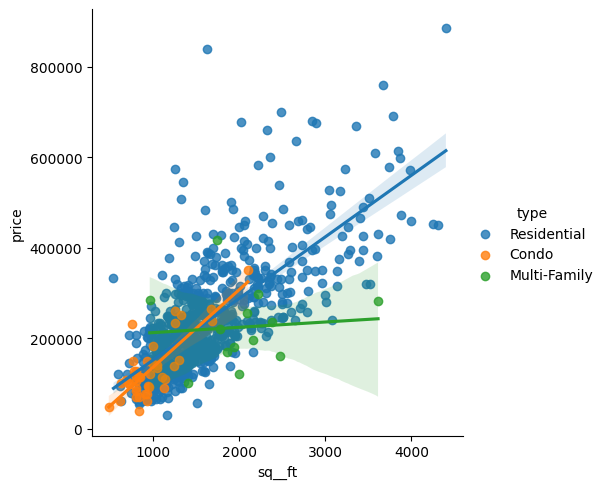

In [43]:
sns.lmplot(
    x='sq__ft',
    y='price',
    hue='type',
    data=dataset_regression)

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [44]:
# Normality:  Do the Residual Errors follow a normal distribution?
residuals = y_test - y_pred

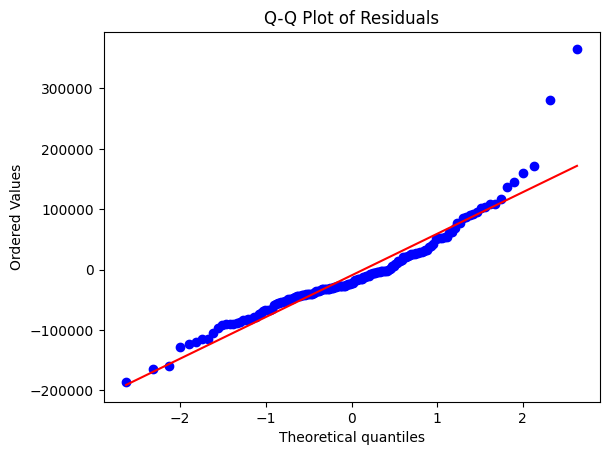

In [45]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

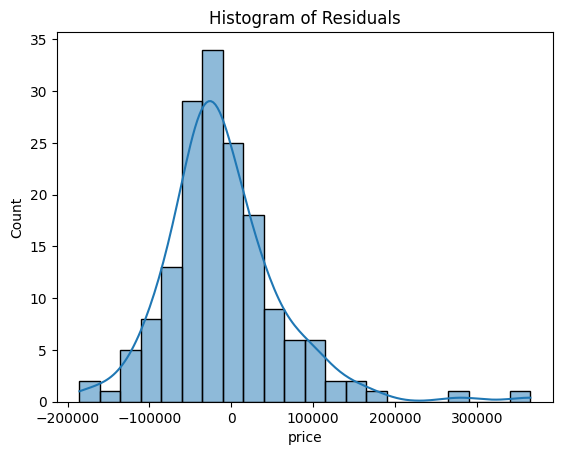

In [46]:
# Your residuals do not appear to be normally distributed.
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

the error is not normal so their are bias or highly errored predictions when the price is high

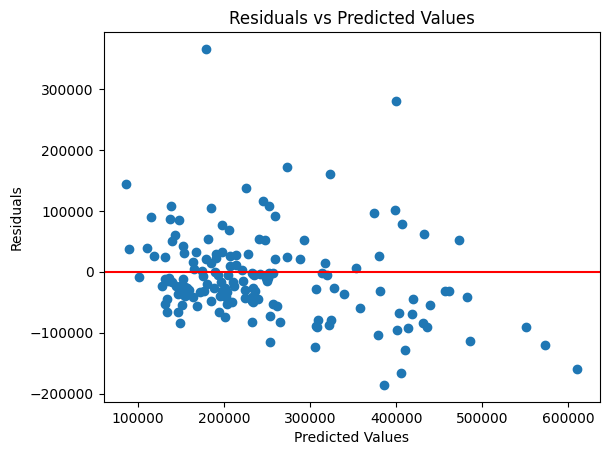

In [47]:
# Equality of variance.  
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

 There are curve in the errors, so it failed in this one 

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

MSE, RMSE, R squared

In [49]:
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.root_mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test , y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MSE: 5212561372.877203
RMSE: 72198.07042350373
R2: 0.5706813800682383
